---

📅 **Published on:** October 22, 2024  
✍️ **Author:** Adnan Alaref  

---

The dataset used in this project is the **Vehicle Dataset from CarDekho**. It contains information about various vehicles, including features such as ****Car_Name, Year, Price, Fuel type****, and more. This dataset will be used to build machine learning models for vehicle price prediction,or other automotive insights.

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌 First we build Models that Generally Not Require Scaling Data (GBR ,XGP ,Random Forest Regression).***
</div>

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 1: Import Library.  </p>***

In [185]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import metrics 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate

from scipy import stats
from numpy.linalg import cond
from scipy.stats import anderson
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 10)

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 2: Read DataSet.  </p>***

In [186]:
df_main = pd.read_csv(r'/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df_main

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**The Target Column is `Selling_Price`**

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 3: Dataset Exploration | Overview.  </p>***

In [3]:
df_main.head(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,9.540000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,9.850000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850000,4.150000,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600000,6.870000,42450,Diesel,Dealer,Manual,0


In [4]:
df_main.tail().style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.500000,11.600000,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.000000,5.900000,60000,Petrol,Dealer,Manual,0
298,city,2009,3.350000,11.000000,87934,Petrol,Dealer,Manual,0
299,city,2017,11.500000,12.500000,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.300000,5.900000,5464,Petrol,Dealer,Manual,0


In [24]:
df_main.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
231,verna,2017,9.250000,9.400000,15001,Petrol,Dealer,Manual,0
8,ciaz,2016,8.750000,8.890000,20273,Diesel,Dealer,Manual,0
192,Hero Hunk,2007,0.200000,0.750000,49000,Petrol,Individual,Manual,1
187,Honda CB twister,2013,0.250000,0.510000,32000,Petrol,Individual,Manual,0
72,corolla altis,2013,7.450000,18.610000,56001,Petrol,Dealer,Manual,0


In [187]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* Info our dataset tell us:
  - We see that, the dataset has `301 rows` and `9 columns`. Out of these 9 columns, **3 have integers classes** and **2 have floats classes** and **the rest have object (or character) classes**. 
  - An alternative way of quickly checking rows and columns is

In [188]:
df_main.shape

(301, 9)

***Numerical Columns Description:***

In [170]:
df_main.describe(include = 'number').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


***Object Columns Description:***

In [171]:
df_main.describe(include = 'object').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 4: Data Preparation.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.1: Feature Subset Selection.  </p>***

In [189]:
len(df_main['Car_Name'].unique()) # Or df_main['Car_Name'].unique()

98

*Since Car_Name contains `98 unique categories`, and this number of categories is very high compared to the number of dataset samples, it is better to drop it:*

In [190]:
df_main.drop(labels = 'Car_Name' ,axis = 'columns' ,inplace=True)

In [191]:
print(df_main['Fuel_Type'].unique())
print(df_main['Seller_Type'].unique())
print(df_main['Transmission'].unique())
print(df_main['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [175]:
len(df_main.Selling_Price.value_counts())

156

In [11]:
pd.DataFrame(df_main.Selling_Price.value_counts()).T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Selling_Price,0.450000,0.600000,5.250000,4.500000,0.200000,4.750000,0.250000,0.400000,0.500000,4.000000,5.500000,1.050000,0.350000,3.000000,6.000000,0.750000,0.480000,1.150000,0.650000,3.100000,2.850000,1.100000,23.000000,1.350000,2.250000,7.750000,9.250000,1.200000,7.450000,0.300000,7.500000,11.250000,3.250000,2.650000,4.400000,2.900000,3.750000,0.900000,4.800000,3.900000,5.950000,6.250000,5.400000,3.950000,8.400000,0.550000,3.350000,0.420000,5.850000,7.250000,6.500000,4.900000,2.500000,0.380000,1.950000,4.950000,2.950000,4.100000,3.500000,2.550000,1.250000,8.250000,5.300000,2.750000,5.750000,3.150000,6.450000,11.750000,4.850000,0.100000,0.120000,7.900000,5.150000,7.200000,5.110000,2.700000,9.500000,8.550000,6.400000,10.110000,5.650000,7.400000,8.990000,2.100000,9.700000,8.650000,10.900000,6.700000,8.350000,3.650000,6.600000,9.150000,8.500000,10.250000,0.160000,5.000000,12.900000,5.200000,5.350000,2.000000,9.100000,11.450000,6.150000,0.150000,1.110000,0.170000,16.000000,1.500000,14.250000,4.350000,19.750000,33.000000,23.500000,18.750000,6.950000,19.990000,3.600000,18.000000,14.730000,14.900000,5.800000,4.650000,2.350000,4.150000,6.100000,6.850000,8.750000,6.750000,4.600000,14.500000,12.500000,0.180000,1.650000,0.270000,0.310000,0.510000,0.520000,0.720000,0.780000,0.800000,0.950000,1.000000,1.450000,1.700000,3.490000,1.750000,9.650000,7.050000,17.000000,20.750000,3.510000,3.800000,3.450000,5.900000,35.000000,11.500000
count,8,8,7,7,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [176]:
df_grouped = df_main.groupby(['Selling_Price']).max().sort_values(by='Selling_Price',ascending=False)
df_grouped.head(10).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,,,,,,,
35.000000,2010,92.600000,78000,Diesel,Dealer,Manual,0
33.000000,2017,36.230000,6000,Diesel,Dealer,Automatic,0
23.500000,2015,35.960000,47000,Diesel,Dealer,Automatic,0
23.000000,2017,30.610000,40000,Diesel,Dealer,Automatic,0
20.750000,2016,25.390000,29000,Diesel,Dealer,Automatic,0
19.990000,2014,35.960000,41000,Diesel,Dealer,Automatic,0
19.750000,2017,23.150000,11000,Petrol,Dealer,Automatic,0
18.750000,2014,35.960000,78000,Diesel,Dealer,Automatic,0
18.000000,2017,19.770000,15000,Diesel,Dealer,Automatic,0


In [192]:
#check proportion of target variable
prop_target = pd.DataFrame(df_main.Selling_Price.value_counts()/df_main.shape[0])
prop_target.T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

Selling_Price,0.450000,0.600000,5.250000,4.500000,0.200000,4.750000,0.250000,0.400000,0.500000,4.000000,5.500000,1.050000,0.350000,3.000000,6.000000,0.750000,0.480000,1.150000,0.650000,3.100000,2.850000,1.100000,23.000000,1.350000,2.250000,7.750000,9.250000,1.200000,7.450000,0.300000,7.500000,11.250000,3.250000,2.650000,4.400000,2.900000,3.750000,0.900000,4.800000,3.900000,5.950000,6.250000,5.400000,3.950000,8.400000,0.550000,3.350000,0.420000,5.850000,7.250000,6.500000,4.900000,2.500000,0.380000,1.950000,4.950000,2.950000,4.100000,3.500000,2.550000,1.250000,8.250000,5.300000,2.750000,5.750000,3.150000,6.450000,11.750000,4.850000,0.100000,0.120000,7.900000,5.150000,7.200000,5.110000,2.700000,9.500000,8.550000,6.400000,10.110000,5.650000,7.400000,8.990000,2.100000,9.700000,8.650000,10.900000,6.700000,8.350000,3.650000,6.600000,9.150000,8.500000,10.250000,0.160000,5.000000,12.900000,5.200000,5.350000,2.000000,9.100000,11.450000,6.150000,0.150000,1.110000,0.170000,16.000000,1.500000,14.250000,4.350000,19.750000,33.000000,23.500000,18.750000,6.950000,19.990000,3.600000,18.000000,14.730000,14.900000,5.800000,4.650000,2.350000,4.150000,6.100000,6.850000,8.750000,6.750000,4.600000,14.500000,12.500000,0.180000,1.650000,0.270000,0.310000,0.510000,0.520000,0.720000,0.780000,0.800000,0.950000,1.000000,1.450000,1.700000,3.490000,1.750000,9.650000,7.050000,17.000000,20.750000,3.510000,3.800000,3.450000,5.900000,35.000000,11.500000
count,0.026578,0.026578,0.023256,0.023256,0.019934,0.019934,0.016611,0.016611,0.016611,0.016611,0.016611,0.016611,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.013289,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.009967,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.006645,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322,0.003322


**As see for example the  proportion of target variable:**
<br>
**45k &emsp; 0.026578%  
20k   &emsp; 0.019934%**
<br>***Name:   Selling_Price,  dtype: float64***</br>


***Make Filter over Dataset***

In [178]:
df_main[(df_main['Seller_Type'] == 'Dealer') & (df_main['Transmission'] == 'Manual')]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


***Let's create a cross tab of the `Selling_Price` variable with `Seller_Type` (Dealer,Individual) variable. With this, we'll try to understand the influence of Seller_Type on the Selling_Price variable.***

In [12]:
pd.crosstab(df_main['Seller_Type'], df_main['Selling_Price'],margins=True)

Selling_Price,0.1,0.12,0.15,0.16,0.17,0.18,0.2,0.25,0.27,0.3,...,18.0,18.75,19.75,19.99,20.75,23.0,23.5,33.0,35.0,All
Seller_Type,,,,,,,,,,,,,,,,,,,,,
Dealer,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,3,1,1,1,195
Individual,1,1,1,1,1,1,6,5,1,3,...,0,0,0,0,0,0,0,0,0,106
All,1,1,1,1,1,1,6,5,1,3,...,1,1,1,1,1,3,1,1,1,301


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.2: Feature Transformation.  </p>***

In [179]:
df_main.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

***ِThe Car Age is more than 1 year old, which is the year of manufacture.***

In [193]:
df_main.insert(0,'Age',df_main.Year.max()+1 - df_main.Year)
df_main.drop(labels = 'Year' ,axis = 'columns',inplace=True)
df_main.head(2).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,6,4.750000,9.540000,43000,Diesel,Dealer,Manual,0


In [181]:
pd.DataFrame(df_main.columns).T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,0,1,2,3,4,5,6,7
0,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.3: Outlier Detection.  </p>***

[<center><img src="https://www.mdpi.com/geotechnics/geotechnics-03-00022/article_deploy/html/images/geotechnics-03-00022-g003-550.jpg" 
  width="500"
  height="1000"></center>](Outlier.jpg)

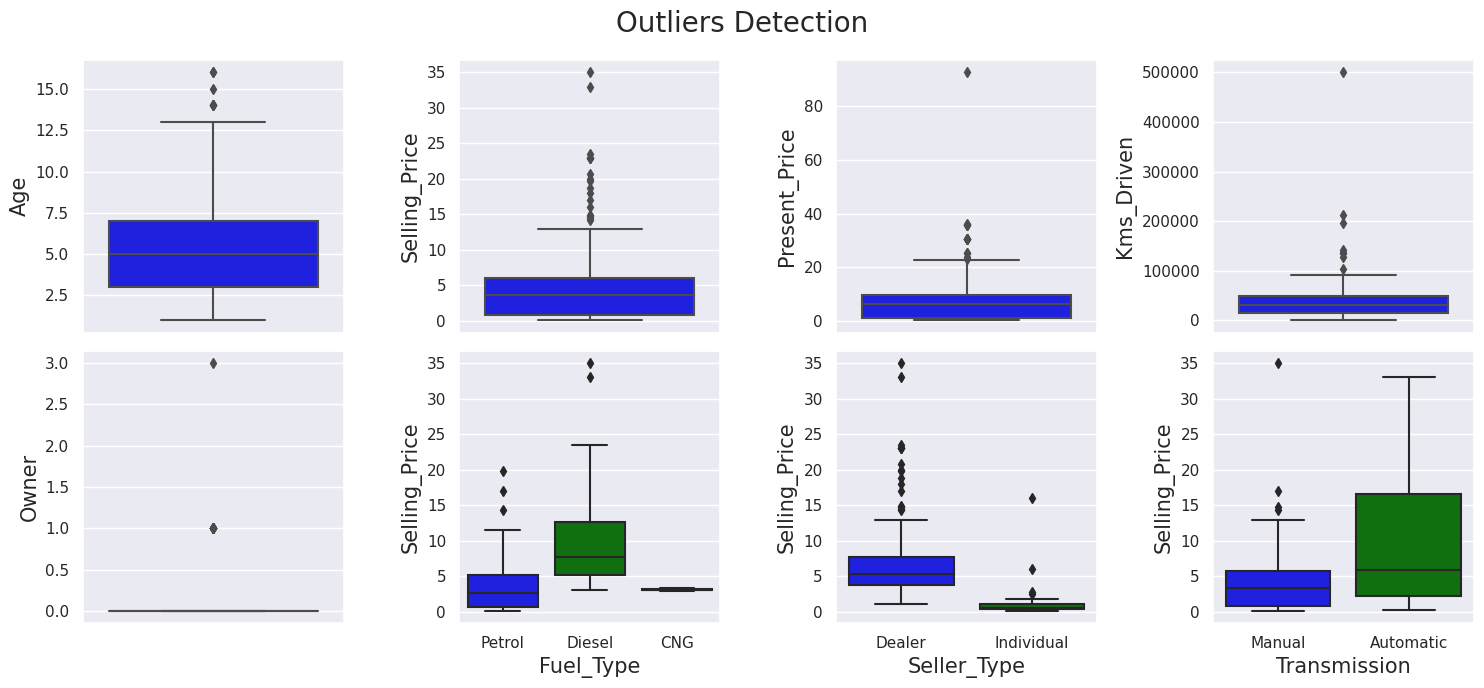

In [194]:
sns.set_style('darkgrid')
Color = ['blue','green','orange']
#Color number equal max cartigory feature number
CustomPalette = sns.set_palette(sns.color_palette(Color)) 

#Make Numerical features first then catigorical features
#Features = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Seller_Type','Fuel_Type','Transmission'] Or
Features = np.concatenate([df_main.select_dtypes(exclude = 'object').columns.values,
                                             df_main.select_dtypes(include='object').columns.values])

fig ,ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,7) ,dpi=100)
'''
A dpi of 100 means that the plot will have 100 dots (or pixels) per inch.
Higher dpi values result in higher resolution (more detailed) images.
''' 
for i,col in enumerate(Features):
    x = i//4
    y = i%4
    
    if i<5:
        sns.boxplot(data=df_main ,y=col ,ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df_main ,x=col ,y='Selling_Price' ,ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.suptitle('Outliers Detection',fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
Features = ['Age','Selling_Price','Present_Price','Kms_Driven','Owner','Fuel_Type','Seller_Type','Transmission']
fig = make_subplots(rows =2 ,cols = 4)

i=0
for row in range(1,3):
    for col in range(1,5):
        fig.add_trace(go.Box(y=df_main[Features[i]],name = Features[i]),row=row,col=col)
        i+=1
        
fig.update_layout(height=700 ,showlegend=True , width=1000 ,title={
                                                    'text': 'Trace Outliers Detection',  # Title text
                                                    'x': 0.5,                         # Position of the title (0: left, 1: right, 0.5: center)
                                                    'xanchor': 'center',              # Anchor title to the center
                                                    'yanchor': 'top'                  # Vertical alignment of the title
                                                    })
fig.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.4: Calculate Outliers By IQR.  </p>***

In [196]:
Outliers_data  = []
Outliers_Index = []
target_feature = 'Selling_Price'

# first calc outliers for Object data with Selling_Price
for col in df_main.select_dtypes(include = 'object').columns:
    for cat in df_main[col].unique(): # this return ex... ['Dealer', 'Individual'] 
        df_cur_cat = df_main[df_main[col]==cat]
        Q1 = np.percentile(df_cur_cat[target_feature],25)
        Q3 = np.percentile(df_cur_cat[target_feature],75)
        # Calc IQR 
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        Outliers_samples = df_cur_cat[(df_cur_cat[target_feature] < lower_bound) | (df_cur_cat[target_feature] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())

# Second calc outliers for Numerical data
for col in df_main.select_dtypes(include = 'number').columns:
        Q1 = np.percentile(df_main[col],25)
        Q3 = np.percentile(df_main[col],75)
        # Calc IQR 
        IQR = Q3 - Q1
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        Outliers_samples = df_main[(df_main[col] < lower_bound) | (df_main[col] > upper_bound)]
        Outliers_data.extend(Outliers_samples.values.tolist())
        Outliers_Index.extend(Outliers_samples.index.tolist())
        
Outliers_Index = list(set(Outliers_Index))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(Outliers_Index), Outliers_Index))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


***Find maximum value in each numerical column to determine what data & index will be outlier Or removing***

In [197]:
pd.DataFrame((Outliers_data)).max()

0            16
1         35.00
2         92.60
3        500000
4        Petrol
5    Individual
6        Manual
7             3
dtype: object

***As we can see :*** 
- ***We will give all data label `Normal`.***
- ***And we will change a label to `Outlier` for data that falls inside Outliers_Index.***
- ***we will change a label to `Removing` for data with a `Selling_Price` _`index 1 in upove`_ greater than 33 and a _`Kms_Driven`  `index 3 in upove`_ greater than 400,000.***

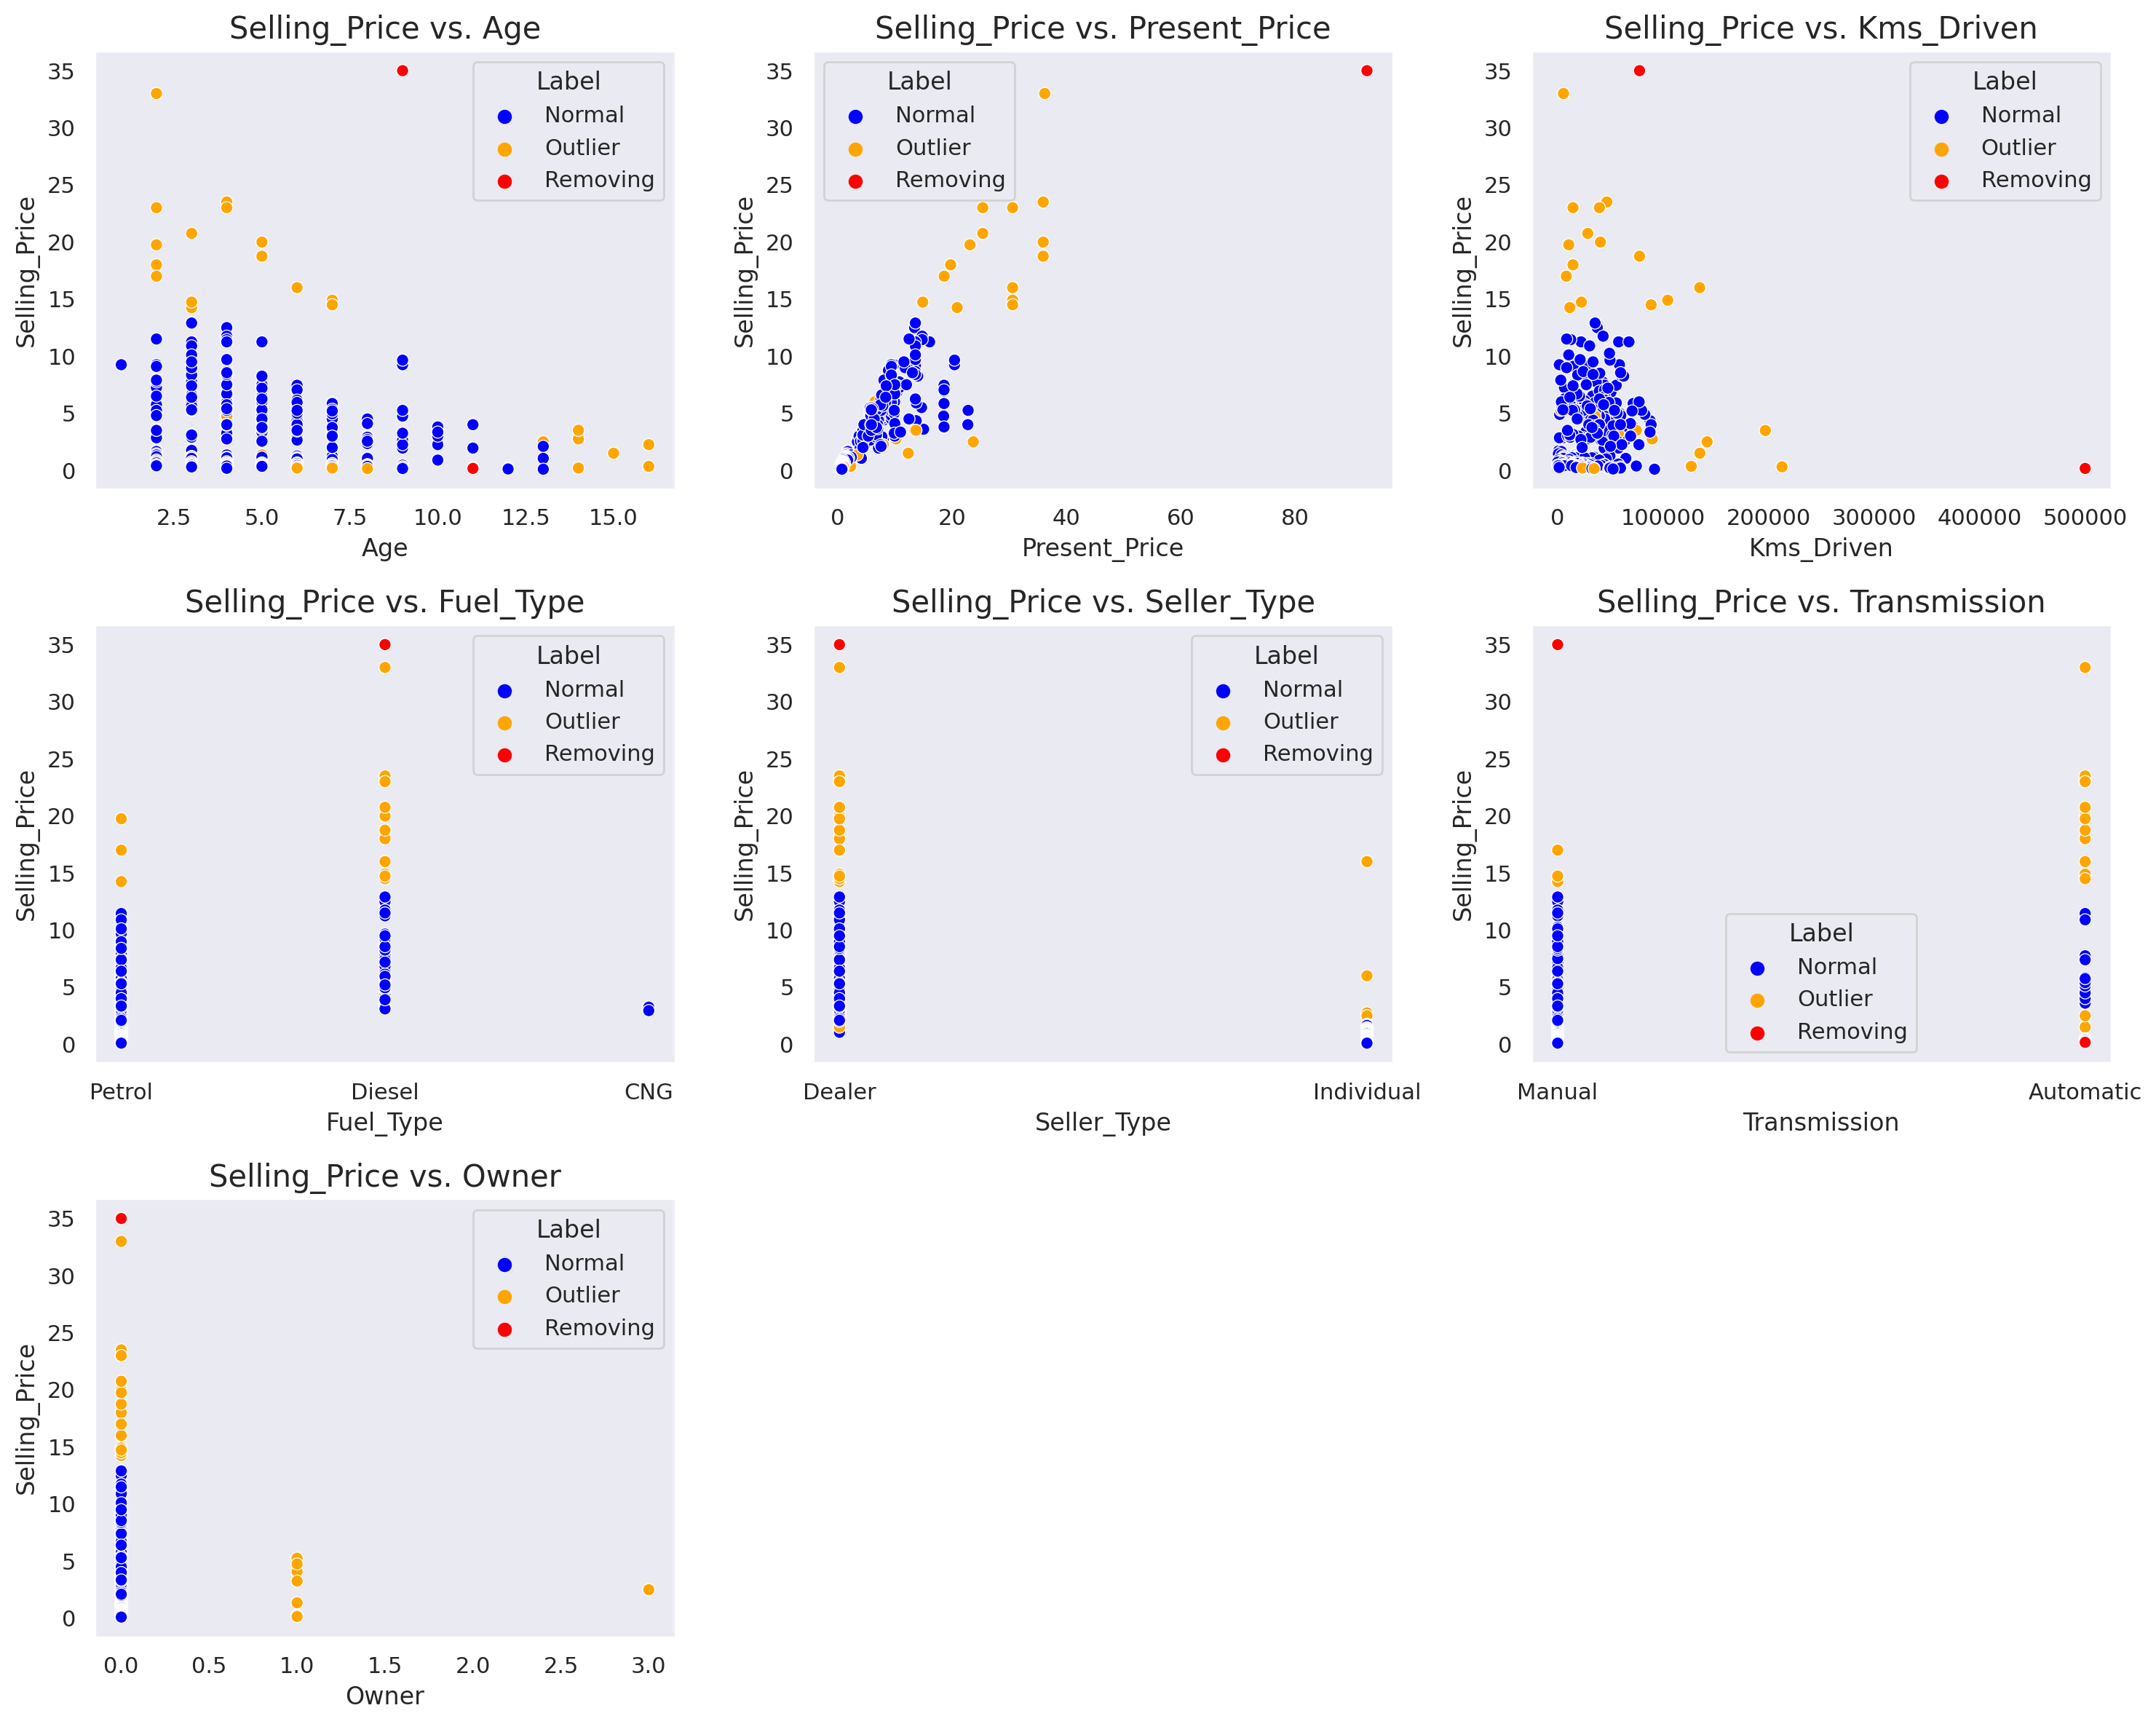

In [198]:
target = 'Selling_Price'
df_second = df_main.copy()
Features = df_second.columns.drop(labels = target)

# Outliers Labeling
df_second['Label'] = 'Normal'
df_second.loc[Outliers_Index,'Label'] = 'Outlier'

# Removing
Removing_Index = []
Removing_Index.extend(df_second[df_second[target]>33].index)
Removing_Index.extend(df_second[df_second['Kms_Driven']>400000].index)
df_second.loc[Removing_Index,'Label'] = 'Removing'

# Strat Plot
sns.set_style('darkgrid')
Colors = ['blue' ,'orange' ,'red']
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 3 ,ncols = 3 ,figsize = (15,12) ,dpi = 200)
for i in range(len(Features)):
    x = i//3
    y = i%3
    sns.scatterplot(data = df_second ,x = Features[i] ,y = target ,hue = 'Label' , ax = ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, Features[i]), size = 15)
    ax[x,y].xaxis.label.set_size(12)
    ax[x,y].yaxis.label.set_size(12)
    ax[x,y].grid()
 
# Close plot on  
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.tight_layout()
plt.show()

In [162]:
# dataframe with Label column that we create it upove
df_second.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Label
196,11,0.170000,0.520000,500000,Petrol,Individual,Automatic,0,Removing
39,16,2.250000,7.980000,62000,Petrol,Dealer,Manual,0,Outlier
278,3,6.000000,8.400000,4000,Petrol,Dealer,Manual,0,Normal
297,4,4.000000,5.900000,60000,Petrol,Dealer,Manual,0,Normal
169,4,0.400000,0.540000,14000,Petrol,Individual,Manual,0,Normal


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.5: Discover Missing Values.  </p>***

In [20]:
pd.DataFrame(df_main.isna().sum()).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,0
Age,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


***Not Found Any Misssing Values***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.6: Discover Duplicates.  </p>***

In [199]:
df_main[df_main.duplicated(keep=False)].style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.750000,10.790000,43000,Diesel,Dealer,Manual,0
17,3,7.750000,10.790000,43000,Diesel,Dealer,Manual,0
51,4,23.000000,30.610000,40000,Diesel,Dealer,Automatic,0
93,4,23.000000,30.610000,40000,Diesel,Dealer,Automatic,0


***We will not drop duplicted beacuse cars can have same features with others***

In [200]:
df_main.duplicated(keep=False).value_counts()

False    297
True       4
Name: count, dtype: int64

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 4.7: Drop Outliers.  </p>***

***We will reomving data with label `Removing`***

In [201]:
df_car = df_main.copy()
df_car.drop(Removing_Index ,inplace = True)
df_car.reset_index(drop = True ,inplace = True) 

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 5: EDA.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.1: Dataset variables analysis.  </p>***

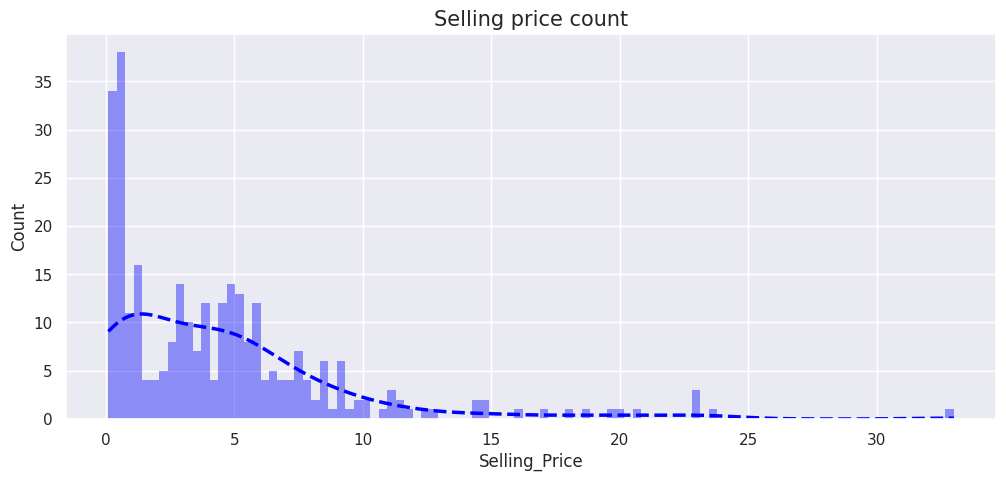

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
sns.histplot(data = df_car ,x = df_car.Selling_Price ,bins = 100 ,kde = True ,edgecolor = 'none' ,alpha = 0.4 ,line_kws = {'linestyle':'--','lw':2.5})
plt.title('Selling price count',fontsize = 15)
plt.xlabel('Selling_Price',fontsize = 12)
plt.ylabel('Count' ,fontsize =12)
plt.show()

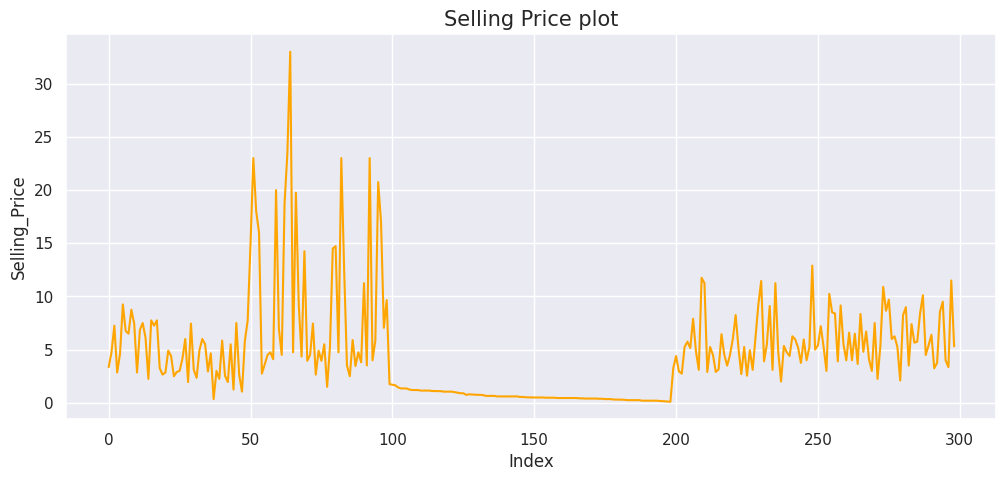

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
plt.plot(df_car.index ,df_car.Selling_Price ,color='orange')
plt.title('Selling Price plot',fontsize = 15)
plt.xlabel('Index' ,fontsize = 12)
plt.ylabel('Selling_Price' ,fontsize =12)
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.2: Dataset Pairwise Plots.  </p>***

***Creates a grid of scatterplots (pairwise relationships) for all numerical columns in the DataFrame df_car. Each variable is plotted against every other variable, including itself.***
* Diagonal Plots: The diagonal in the grid usually contains histograms or KDE plots (Kernel Density Estimate) for each individual variable, showing their distributions.
- Off-Diagonal Plots: The off-diagonal plots contain scatterplots showing relationships between pairs of variables.

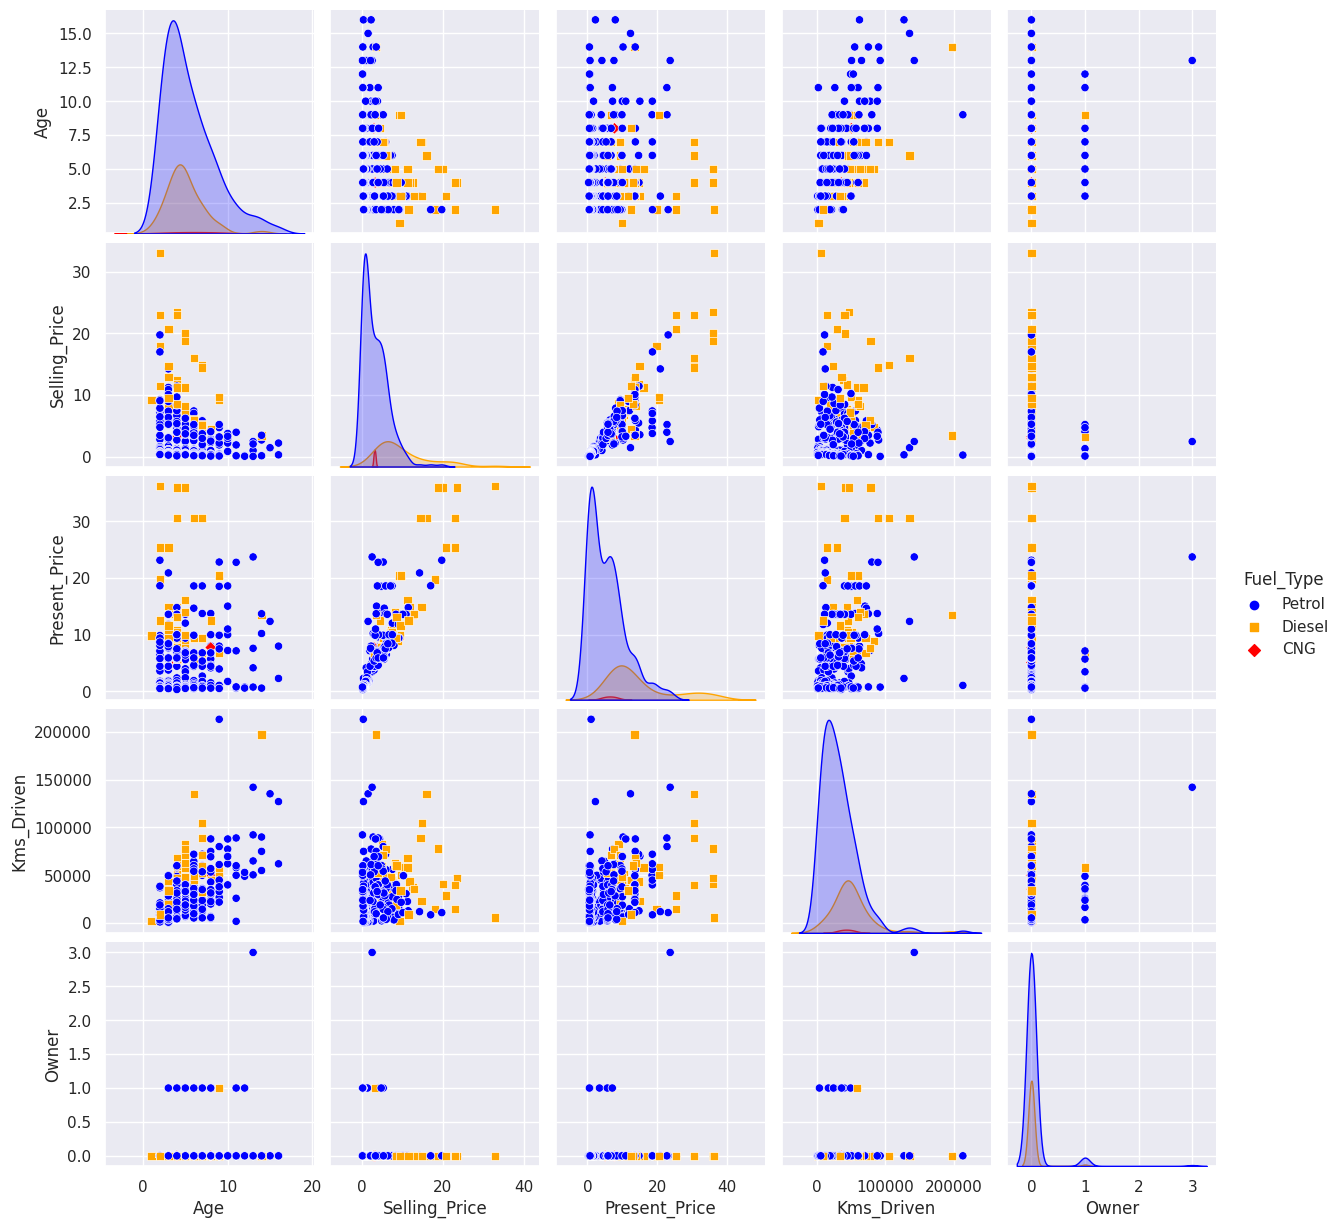

In [26]:
sns.set_style('darkgrid')
sns.pairplot(df_car ,hue='Fuel_Type' , markers=["o", "s", "D"])
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.3: Categorical Variables Univariate Analysis.  </p>***

In [209]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

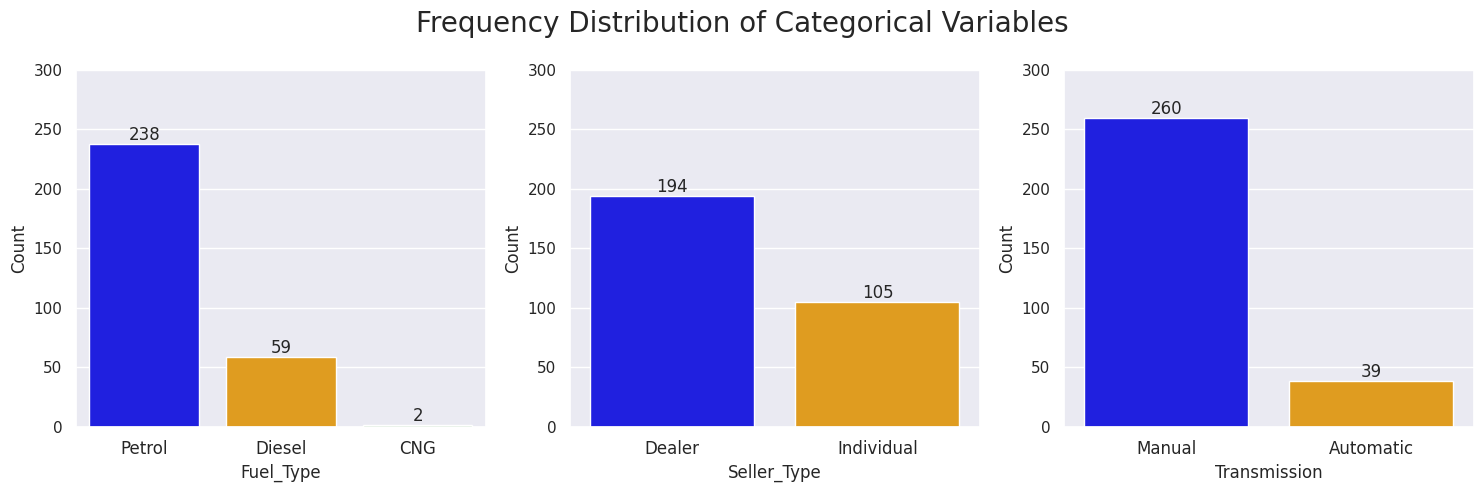

In [202]:
sns.set_style('darkgrid')
Colors  = ['blue' ,'orange' ,'green']
Catcols = df_car.select_dtypes(include = 'object').columns
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (15,5) ,dpi=100)
for i,col in enumerate(Catcols):
    graph = sns.countplot(data = df_car ,x = col ,ax = ax[i])
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Count',fontsize = 12)
    ax[i].set_ylim([0,300])
    ax[i].set_xticklabels(ax[i].get_xticklabels() ,rotation = 0 ,fontsize = 12)
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show()

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.4: Numerical Variables Univariate Analysis.  </p>***

In [211]:
df_car.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

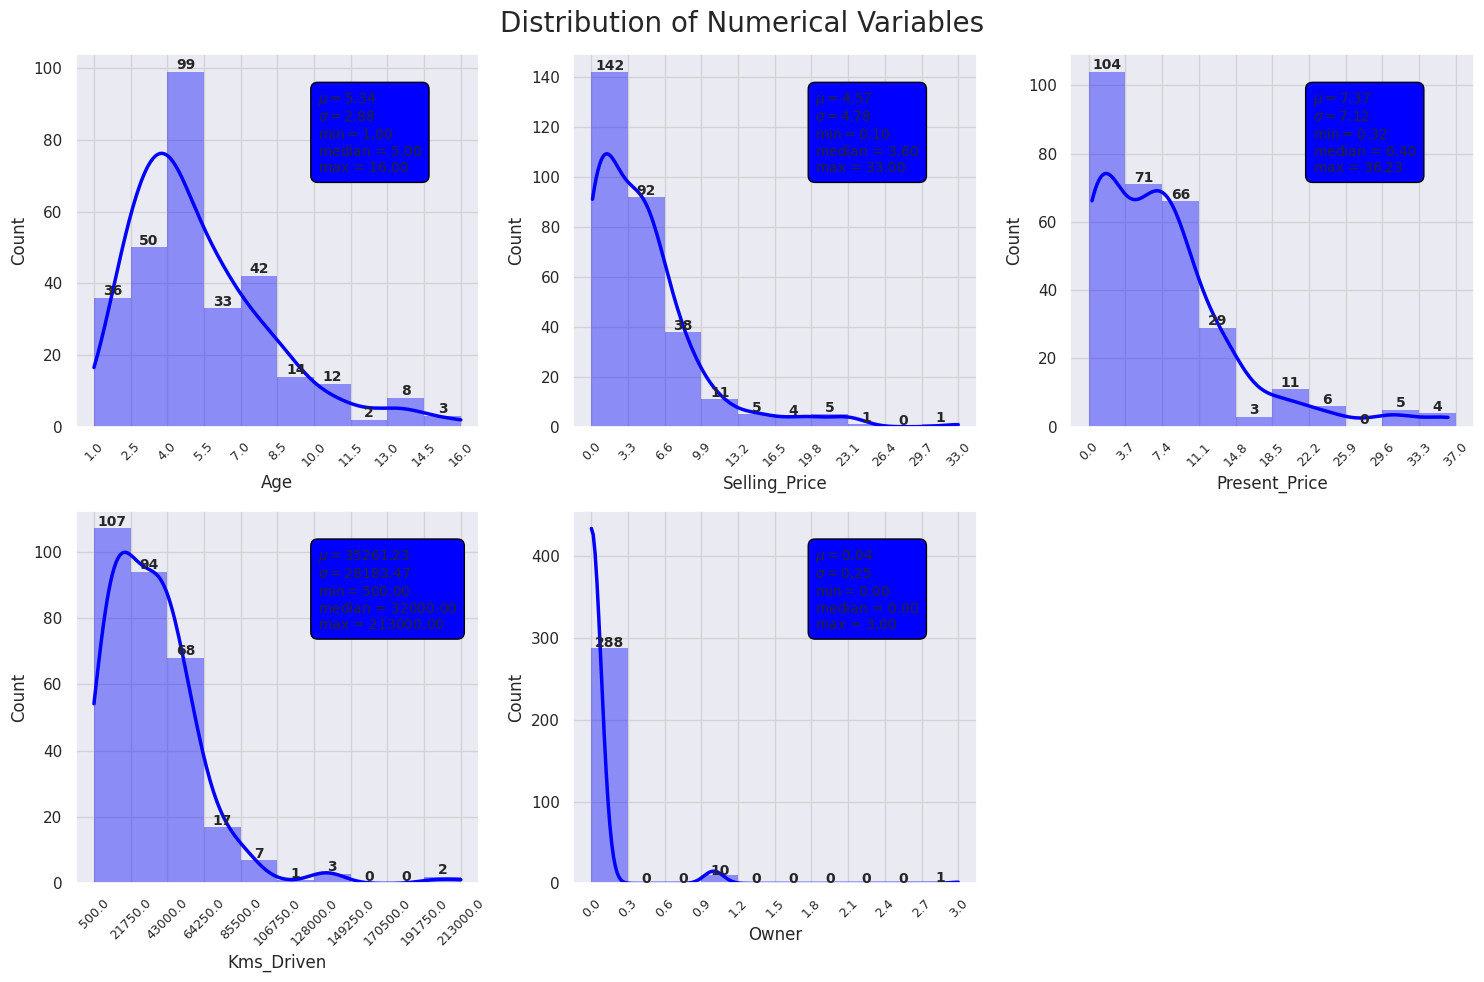

In [203]:
Color = 'blue'
Numcols = df_car.select_dtypes(include = 'number').columns

fig ,ax = plt.subplots(nrows = 2 ,ncols = 3 ,figsize = (15,10) ,dpi=100)
for i,col in enumerate(Numcols):
    x = i//3
    y = i%3
     
    hist ,bin_edges = np.histogram(df_car[col] ,range = (np.floor(df_car[col].min()) ,np.ceil(df_car[col].max())))
    '''
     hist => Array of counts for each bin
     bin_edges => Array of bin_edgs [length  is (bins+1)]
    '''
    graph = sns.histplot(data = df_car ,x = col ,bins = bin_edges ,kde = True ,edgecolor = 'none' ,
                              color = Color ,alpha = 0.4 ,line_kws = {'linestyle':'-','lw':2.5} ,ax = ax[x,y])
    
    ax[x,y].set_xlabel(col ,fontsize = 12)
    ax[x,y].set_ylabel('Count' ,fontsize = 12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(),rotation = 45 ,fontsize = 9)
    ax[x,y].grid(color='lightgray')
    
    for j,p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()) ,xy = (p.get_x() + p.get_width()/2 , p.get_height()+0.75)
        ,ha = 'center' ,fontsize = 10 ,fontweight = 'bold')
        
    textstr = '\n'.join((
        r'$\mu = %.2f$'%df_car[col].mean(),
        r'$\sigma = %.2f$'%df_car[col].std(),
        r'$\mathrm{min} = %.2f$'%df_car[col].min(),
        r'$\mathrm{median}$ = %.2f'%df_car[col].median(),
        r'$\mathrm{max}$ = %.2f'%df_car[col].max()
        ))
    ax[x,y].text(0.6 ,0.9 ,textstr ,transform = ax[x,y].transAxes ,fontsize = 10 , verticalalignment = 'top',
                 bbox = dict(boxstyle = 'round' ,facecolor = Color , edgecolor = 'black' ,pad = .5))
        
plt.suptitle('Distribution of Numerical Variables', fontsize=20)
ax[1,2].axis('off')
plt.tight_layout()
plt.show()

***As we can see,variables are right-skewed.***
- ***Right-skewness can affect statistical analyses, especially when using models that assume normally distributed data (ex. linear regression).***
- ***Should I transform the data to correct the skewness by `Box-Cox Transformation` later***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.5: Target vs. Categorical Features Bivariate Analysis.  </p>***

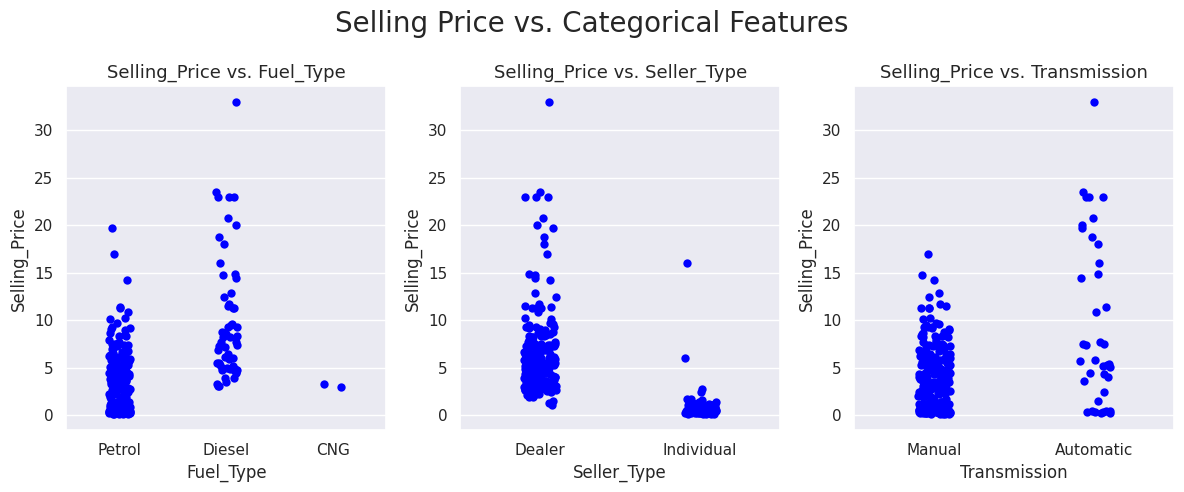

In [204]:
Color = 'blue' 
Catcols = df_car.select_dtypes(include = 'object').columns

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (12,5) ,dpi=100)
for i,col in enumerate(Catcols):                                                                       #add random noise
    sns.stripplot(data = df_car ,x = col , y = df_car.Selling_Price ,ax = ax[i] ,size = 6 ,color = Color ,jitter = True)
    ax[i].set_title('{} vs. {}'.format('Selling_Price' ,col),fontsize = 13)
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Selling_Price' ,fontsize = 12)

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

* ***Conclusion:***
  - **Automatic cars are more expensive than manual cars.**
  - **Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.**
  - **The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.**

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 5.6: Target vs. Numerical Features Bivariate Analysis.  </p>***

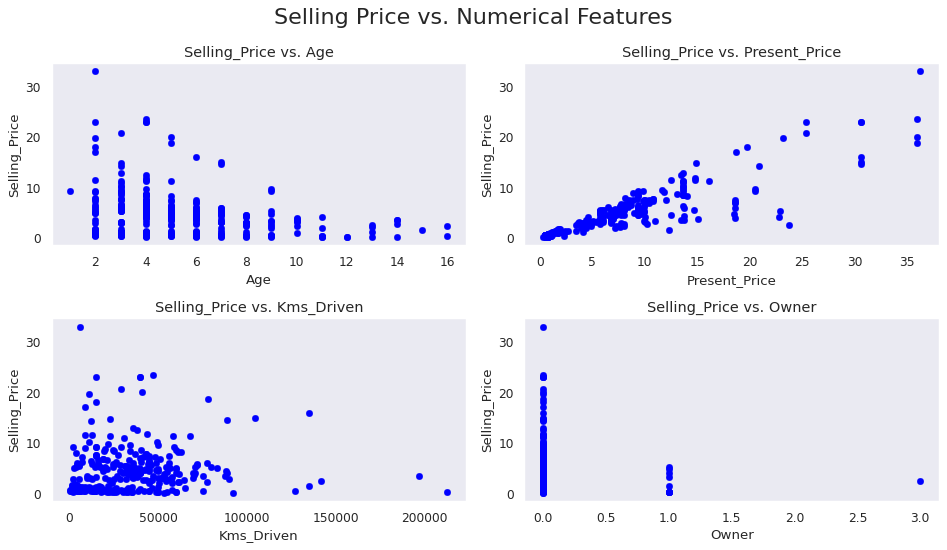

In [205]:
Color = 'blue'
traget = 'Selling_Price'
cols_drop = [target]
Numerical_cols = df_car.select_dtypes(include = 'number').columns.values #Np_array
Numcols = np.array([col for col in list(Numerical_cols) if col not in cols_drop]) # Or
'''
Numerical_cols = df_car.select_dtypes(include = 'number').columns 
Numcols = pd.Index([col for col in list(Numerical_cols) if col not in cols_drop])
#return list-like object (Index) containing the names of all the columns in df_car that are numeric.
'''

fig ,ax = plt.subplots(nrows = 2 ,ncols = 2 ,figsize = (12,7) ,dpi = 80)
for i,col in enumerate(Numcols):
    x = i//2
    y = i%2
    
    ax[x,y].scatter(x = df_car[col] ,y = df_car[target] ,color = 'blue' ,marker = 'o' ,linewidths = .25)
    ax[x,y].set_title('{} vs. {}'.format(target ,col),fontsize = 13)
    ax[x,y].set_ylabel(target ,fontsize = 12)
    ax[x,y].set_xlabel(col ,fontsize = 12)
    ax[x,y].grid()
    
plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

* ***Conclusion:***

  - **As the car ages increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to the Age of the car.**
  - **As Present_Price increases, Selling_Price increases as well. So Selling_Price is `directly proportional` to Present_Price.**
  - **As the car's Kms_Driven increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to Kms_Driven.**
  - **As the number of previous car owners increases, its Selling_Price decreases. So Selling_Price is `inversely proportional` to Owner.**

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 6: Categorical Variables Encoding.  </p>***

***Drop First Dummy: To avoid multicollinearity (for linear regression models), you might want to drop the first dummy variable of each categorical column***

In [206]:
Cat_cols = ['Fule_Type' ,'Seller_Type' ,'Transmission']
df_car = pd.get_dummies(df_car ,Cat_cols ,drop_first = True ,dtype = int)
df_car.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual
168,4,0.400000,0.540000,14000,0,0,1,1,1
159,8,0.450000,0.950000,24000,0,0,1,1,1
61,4,4.500000,7.700000,40588,0,0,1,0,1
195,9,0.160000,0.510000,33000,0,0,1,1,1
51,4,23.000000,30.610000,40000,0,1,0,0,0


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 7: Correlation Analysis.  </p>***

In [207]:
pd.concat([df_car.drop(labels = target ,axis = 'columns') , df_car[target]],axis = 'columns').corr()

,Age,Present_Price,Kms_Driven,Owner,Fule_Type_Diesel,Fule_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
Age,1.00,0.01,0.62,0.19,-0.07,0.07,0.03,0.01,-0.28
Present_Price,0.01,1.00,0.34,0.02,0.50,-0.49,-0.59,-0.45,0.88
Kms_Driven,0.62,0.34,1.00,0.13,0.26,-0.26,-0.21,-0.09,0.06
Owner,0.19,0.02,0.13,1.00,-0.05,0.06,0.13,-0.05,-0.09
Fule_Type_Diesel,-0.07,0.50,0.26,-0.05,1.00,-0.98,-0.35,-0.11,0.55
Fule_Type_Petrol,0.07,-0.49,-0.26,0.06,-0.98,1.00,0.36,0.10,-0.54
Seller_Type_Individual,0.03,-0.59,-0.21,0.13,-0.35,0.36,1.00,0.08,-0.57
Transmission_Manual,0.01,-0.45,-0.09,-0.05,-0.11,0.10,0.08,1.00,-0.41
Selling_Price,-0.28,0.88,0.06,-0.09,0.55,-0.54,-0.57,-0.41,1.00


* ***The correlation coefficient r ranges from -1 to 1:***
  - ***1: Perfect positive correlation***
  - ***-1: Perfect negative correlation***
  - ***0: No correlation***
  - ***0.5 to 1 or -0.5 to -1: Strong correlation***
  - ***0.3 to 0.5 or -0.3 to -0.5: Moderate correlation***
  - ***0 to 0.3 or 0 to -0.3: Weak correlation***

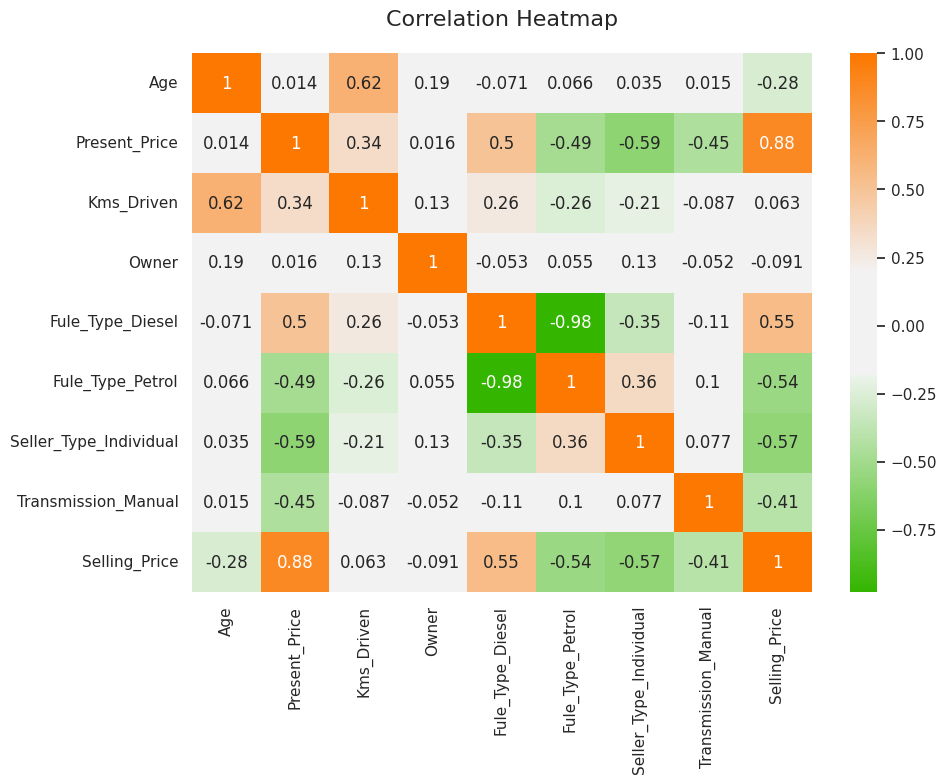

In [208]:
target = 'Selling_Price'
#Create custom cmap_palette by diverging_palette
Cmap = sns.diverging_palette(125 ,28 ,s = 100 ,l = 65 ,sep = 50 ,as_cmap = True)
fig ,ax = plt.subplots(figsize = (10,7) ,dpi = 100)
ax = sns.heatmap(pd.concat([df_car.drop(labels = target ,axis = 'columns') , df_car[target]],axis = 'columns').corr() ,annot = True ,cmap = Cmap)
# drop target column as add and arrange it into last column ,which might be useful for readability.
plt.title('Correlation Heatmap', pad=20, fontsize=16)
plt.show()

* ***Conclusion***
  - ***The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.***
  - ***Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.***

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 8 : Rapid Model Benchmarking using LazyPredict.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Lazypredict is great because it quickly evaluates multiple machine learning models with minimal setup, allowing you to identify the best-performing algorithms without the need for extensive manual tuning or coding.***
</div>

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.1: Determine Features & Target Variables.  </p>***

In [209]:
target = 'Selling_Price' 
X_first = df_car.drop(labels = target ,axis = 'columns')
y_first = df_car[target]

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.2: Split Dataset to Training & Test Sets.  </p>***

In [210]:
X_train_f ,X_test_f ,y_train_f ,y_test_f = train_test_split(X_first ,y_first ,test_size = 0.3 ,random_state=42)
print(X_train_f.shape)
print(X_test_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(209, 8)
(90, 8)
(209,)
(90,)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.3: Build LazyRegressor Model.  </p>***

In [211]:
%%capture
! pip install lazypredict

In [ ]:
'''
To suppress the output when installing a library in a Jupyter notebook
# %%capture   Or
# !pip install lazypredict > /dev/null 2>&1
'''

In [212]:
from lazypredict.Supervised import LazyRegressor

# Initialize and fit LazyRegressor
regressor = LazyRegressor(ignore_warnings=True)
models ,predictions= regressor.fit(X_train_f ,X_test_f ,y_train_f ,y_test_f)
# Save all models information in csv
models.to_csv("lazy_regressor_results.csv")
# Display the results
print(models)

100%|██████████| 42/42 [00:03<00:00, 11.98it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 7
[LightGBM] [Info] Start training from score 4.376220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.4: Best 5 models in terms of accuracy.  </p>***

In [213]:
# Create a dictionary with model names and their corresponding metrics
data = {
    'Model': ['GradientBoostingRegressor', 'ExtraTreesRegressor', 'XGBRegressor', 'RandomForestRegressor', 'BaggingRegressor'],
    'Adjusted R-Squared': [0.98, 0.97, 0.97, 0.96, 0.96],  # None used since value is not provided
    'R-Squared': [0.98, 0.98, 0.98, 0.96, 0.96],
    'RMSE': [0.69, 0.81, 0.84, 1.00, 1.01],
    'Time Taken': [0.15, 0.14, 0.06, 0.19, 0.03]
}
                  
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})


,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,GradientBoostingRegressor,0.980000,0.980000,0.690000,0.150000
1,ExtraTreesRegressor,0.970000,0.980000,0.810000,0.140000
2,XGBRegressor,0.970000,0.980000,0.840000,0.060000
3,RandomForestRegressor,0.960000,0.960000,1.000000,0.190000
4,BaggingRegressor,0.960000,0.960000,1.010000,0.030000


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.5: All Models Evaluate.  </p>***

In [214]:
def model_evaluate(model ,X_train ,X_test ,y_train ,y_test ,model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test ,y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = metrics.r2_score(y_test,y_pred)
    Score_test = model.score(X_test , y_test)*100
    Score_train = model.score(X_train , y_train)*100
    
    n = X_test.shape[0] # Number of samples
    p = X_test.shape[1] # Number of features
    Adjusted_r_squared = 1 - (1 - R2_score) * (n - 1) / (n - p - 1)
    
    # Optionally, print the first few predicted values alongside the actual values
    print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(5))

    return pd.DataFrame(data = [MAE ,MSE ,RMSE ,R2_score ,Score_test ,Score_train ,Adjusted_r_squared] ,
                        index = ['MAE' ,'MSE' ,'RMSE' ,'R2_score ','Score_test' ,'Score_train' ,'Adjusted_r_squared']
                        ,columns = [model_name]).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 8.6:  All Models Evaluate Using Cross Validate.  </p>***

In [215]:
def model_evaluate_use_Cross_validate(model ,X ,y ,Make_scale ,model_name):
    if Make_scale==False:
        pipeline = make_pipeline(model)
    else:        
        pipeline = make_pipeline(StandardScaler(), model)        

    K_Fold = KFold(n_splits = 6 ,shuffle = True ,random_state = 42)
    Scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=K_Fold, return_train_score=True, scoring=Scoring)

    Fit_time = (result['fit_time'])
    MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
    MAE_std =  (-result['test_neg_mean_absolute_error']).std()
    MSE_mean = (-result['test_neg_mean_squared_error']).mean()
    MSE_std =  (-result['test_neg_mean_squared_error']).std()
    RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
    RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
    R2_Score_mean = result['test_r2'].mean()
    R2_Score_std  = result['test_r2'].std()
    R2_train_mean = result['train_r2'].mean()
    R2_train_std  = result['train_r2'].std()

    #Array of fit times for each fold.
    print("Fit Times (seconds): {}".format(Fit_time))
    return pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean,R2_train_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std,R2_train_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score','R2_Train']).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 9: Build GradientBoostingRegressor Model.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.1: Train The Model.  </p>***

In [216]:
model = GradientBoostingRegressor(random_state=42)
Gbr_model = model.fit(X_train_f,y_train_f)

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.2: Model Evaluation.  </p>***

In [217]:
model_evaluate(Gbr_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'GBR Regressor')

     Actual  Predicted
281    8.99       9.08
265    8.35       8.35
164    0.45       0.58
9      7.45       7.13
77     1.50       3.03


,GBR Regressor
MAE,0.402739
MSE,0.477615
RMSE,0.691097
R2_score,0.983290
Score_test,98.329017
Score_train,99.652887
Adjusted_r_squared,0.981640


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 9.3: Model Evaluation using Cross-Validation.  </p>***

In [218]:
model_evaluate_use_Cross_validate(Gbr_model ,X_first ,y_first ,False ,'GBR Regressor')

Fit Times (seconds): [0.0682869  0.06558442 0.06585145 0.06815314 0.06537437 0.06622458]


,Mean,Std
MAE,0.505960,0.097453
MSE,0.967434,0.646947
RMSE,0.933964,0.308458
R2-Score,0.956805,0.022035
R2_Train,0.996412,0.000351


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 10: Build GradientBoostingRegressor Model Using Hyperparmeter Tunning.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : We will make GradientBoostingRegressor hyperparameters tunning model and get best model with best paramters from it then use it in Voting Regressor later.***
</div>


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.1: Train The Model.  </p>***

In [219]:
Gbr_model_tunning = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators':np.arange(100,1000,100),
    'learning_rate':[0.01,0.02,0.05,0.1,0.2],
    'max_depth':np.arange(3,10,2),
    'min_samples_split':np.arange(2,10,2),
    'min_samples_leaf':[1,2,5,7],
    'subsample':[0.7,0.8,0.9,1.0],
    'max_features':[1.0,'sqrt'],     
    'loss': ['squared_error', 'huber'] 
    # This is the Huber loss, a combination of squared error and absolute error. It is robust to outliers.
}

Gbr_search_cv = RandomizedSearchCV(estimator = Gbr_model_tunning, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores

# Fit the model with RandomizedSearchCV
Gbr_search_cv.fit(X_train_f ,y_train_f)
# # Get the best model from RandomizedSearchCV
Best_gbr_model = Gbr_search_cv.best_estimator_
print(Best_gbr_model)

GradientBoostingRegressor(loss='huber', max_depth=9, max_features=1.0,
                          min_samples_split=4, n_estimators=700,
                          random_state=42, subsample=0.8)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.2: Model Evaluation.  </p>***

In [220]:
model_evaluate(Best_gbr_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'GBR_Regressor_Tuning')

     Actual  Predicted
281    8.99       9.68
265    8.35       8.64
164    0.45       0.42
9      7.45       7.01
77     1.50       1.61


,GBR_Regressor_Tuning
MAE,0.441914
MSE,0.484560
RMSE,0.696104
R2_score,0.983047
Score_test,98.304717
Score_train,100.000000
Adjusted_r_squared,0.981373


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 10.3: Model Evaluation using Cross-Validation.  </p>***

In [221]:
model_evaluate_use_Cross_validate(Gbr_search_cv ,X_first ,y_first ,False ,'GBR_Regressor_Tuning') # we must send original model not best_gbr_model because cross val  build new model in it 

Fit Times (seconds): [813.73102617 814.99661684 830.27440357 829.83918762 835.20315838
 816.65366411]


,Mean,Std
MAE,0.529702,0.080369
MSE,1.041239,0.776918
RMSE,0.960358,0.344894
R2-Score,0.954355,0.025585
R2_Train,0.987728,0.010856


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 11: Build RandomForestRegressor Model Using Hyperparmeter Tunning.  </p>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.1: Train The Model.  </p>***

In [222]:
Rand_forst_model = RandomForestRegressor(random_state=42)

# Hyperparameters
n_estemator = list(range(500,1000,100))
max_depth = list(range(4,9,4)) 
min_sample_split = list(range(4,9,2))
min_sample_leaf = [1,2,5,7]
max_features = [1.0,'sqrt']

# Hyperparameters dict
param_grid = {
    'n_estimators': n_estemator,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf,
    'max_features': max_features
}

Rand_forst_cv = RandomizedSearchCV(estimator = Rand_forst_model, param_distributions = param_grid,
                                    n_iter=100, cv=6, random_state =42, n_jobs=-1) # Use all available CPU cores
# Fit the model with RandomizedSearchCV
Rand_forst_cv.fit(X_train_f ,y_train_f)

RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42)

In [223]:
# Get the best model from RandomizedSearchCV
Best_rf_model = Rand_forst_cv.best_estimator_
print(Best_rf_model)

RandomForestRegressor(max_depth=8, min_samples_split=4, n_estimators=500,
                      random_state=42)


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.2: Model Evaluation.  </p>***

In [224]:
model_evaluate(Best_rf_model ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'RandomForest_Tunning')

     Actual  Predicted
281    8.99       9.75
265    8.35       8.15
164    0.45       0.44
9      7.45       6.91
77     1.50       3.52


,RandomForest_Tunning
MAE,0.621049
MSE,1.152584
RMSE,1.073585
R2_score,0.959676
Score_test,95.967571
Score_train,97.211833
Adjusted_r_squared,0.955693


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 11.3: Model Evaluation using Cross-Validation.  </p>***

In [225]:
# we must send original model not Best_rf_model because cross val  build new model in it 
model_evaluate_use_Cross_validate(Rand_forst_cv ,X_first ,y_first ,False ,'RandomForest_Tunning') 

Fit Times (seconds): [612.48805332 615.02416182 614.09970593 614.04556227 612.63265324
 614.66589355]


,Mean,Std
MAE,0.693894,0.189228
MSE,2.235860,1.323522
RMSE,1.417118,0.477113
R2-Score,0.908489,0.040761
R2_Train,0.949910,0.050802


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 12: Build VotingRegressor Model Using 3 Best Models.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : First we use GBR with hypertuning parameters to find best model parameters and then use it in Voting Regressor with ExtraTrees & XGB.</div>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.1: Train The Model.  </p>***

In [226]:
# 1. Define GradientBoostingRegressor Model
GBR = Best_gbr_model

# 2. Define ExtraTreesRegressor Model
EXTATREES  = ExtraTreesRegressor(random_state = 42)

# 3. Define XGB Regressor Model
XGB = XGBRegressor(learning_rate=0.5, n_estimators=200, max_depth =10)

# Buile VotingRegressorModel
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('EXTATREES', EXTATREES), ('XGB',XGB)])
VotingRegressorModel.fit(X_train_f,y_train_f)

VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(loss='huber',
                                                       max_depth=9,
                                                       max_features=1.0,
                                                       min_samples_split=4,
                                                       n_estimators=700,
                                                       random_state=42,
                                                       subsample=0.8)),
                            ('EXTATREES', ExtraTreesRegressor(random_state=42)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=N...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.5, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.2: Model Evaluation.  </p>***

In [227]:
model_evaluate(VotingRegressorModel ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'VotingRegressor')

     Actual  Predicted
281    8.99       9.42
265    8.35       8.75
164    0.45       0.43
9      7.45       7.23
77     1.50       2.66


,VotingRegressor
MAE,0.406472
MSE,0.416983
RMSE,0.645742
R2_score,0.985411
Score_test,98.541142
Score_train,99.999999
Adjusted_r_squared,0.983971


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 12.3: Model Evaluation using Cross-Validation.  </p>***

In [228]:
# we must send original model because cross val  build new model in it 
model_evaluate_use_Cross_validate(VotingRegressorModel ,X_first ,y_first ,False ,'VotingRegressor')

Fit Times (seconds): [9.39985704 9.50509119 9.68425083 9.31805682 9.61871672 8.75732756]


,Mean,Std
MAE,0.512894,0.089175
MSE,0.964096,0.720172
RMSE,0.930718,0.312826
R2-Score,0.958084,0.022636
R2_Train,1.000000,0.000000


In [229]:
print("score_test=", VotingRegressorModel.score(X_test_f , y_test_f)*100)
print("score_train=", VotingRegressorModel.score(X_train_f , y_train_f)*100)

score_test= 98.54114243230978
score_train= 99.99999859874819


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 13: Build StackingRegressor Model Using 4 Best Models.  </p>***

***<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
📌Note : We use Best GBR with hypertuning parameters in Stacking Regressor with RandomForestRegressor & ExtraTrees & Bagging Regressor & Final estimator Ridge.</div>***

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.1: Train The Model.  </p>***

In [230]:
# 1. Define GradientBoostingRegressor
GBR = Best_gbr_model

# 2. Define BAGGING Regressor
BAGGINGREG = BaggingRegressor(random_state = 42)

# 3. Define EXTRATREESRegressor
EXTATREESREG  = ExtraTreesRegressor(random_state = 42)

# 4. Define RandomForestRegressor
RANDFORESTREG = RandomForestRegressor(random_state=42)

# Define the stacking model
estimators = [
    ('GBR',GBR),
    ('BAGGINGREG',BAGGINGREG),
    ('EXTATREESREG',EXTATREESREG),
    ('RANDFORESTREG',RANDFORESTREG)
  ]
# Use Ridge as the final estimator (meta-model)
Stacking_regressor = StackingRegressor(
                 estimators = estimators,
                 final_estimator = Ridge(),
                 cv = 10,
                 n_jobs = -1
 )

Stacking_regressor.fit(X_train_f,y_train_f)

StackingRegressor(cv=10,
                  estimators=[('GBR',
                               GradientBoostingRegressor(loss='huber',
                                                         max_depth=9,
                                                         max_features=1.0,
                                                         min_samples_split=4,
                                                         n_estimators=700,
                                                         random_state=42,
                                                         subsample=0.8)),
                              ('BAGGINGREG', BaggingRegressor(random_state=42)),
                              ('EXTATREESREG',
                               ExtraTreesRegressor(random_state=42)),
                              ('RANDFORESTREG',
                               RandomForestRegressor(random_state=42))],
                  final_estimator=Ridge(), n_jobs=-1)

## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.2: Model Evaluation.  </p>***

In [231]:
model_evaluate(Stacking_regressor ,X_train_f ,X_test_f ,y_train_f ,y_test_f ,'StackingRegressor')

     Actual  Predicted
281    8.99       9.86
265    8.35       9.24
164    0.45       0.08
9      7.45       7.09
77     1.50       1.85


,StackingRegressor
MAE,0.632653
MSE,0.752347
RMSE,0.867379
R2_score,0.973678
Score_test,97.367839
Score_train,98.991545
Adjusted_r_squared,0.971079


## ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   🔸 Step 13.3: Model Evaluation using Cross-Validation.  </p>***

In [232]:
# we must send original model because cross val  build new model in it 
model_evaluate_use_Cross_validate(Stacking_regressor ,X_first ,y_first ,False ,'StackingRegressor')

Fit Times (seconds): [ 96.47042394  94.98992133 100.04061341  97.49856853  96.07899618
  93.92617631]


,Mean,Std
MAE,0.564508,0.094893
MSE,1.007066,0.692975
RMSE,0.953796,0.311993
R2-Score,0.955474,0.023537
R2_Train,0.995877,0.002078


# ***<p style="background-color:#00FFFF;font-family:Gabriola;color:#000080;font-size:150%;text-align:left;border-radius:10px 50px;">   ◍ Step 14: Conclusion..  </p>***

## 📊 **Conclusion** 

In this project, we explored various techniques and methodologies to achieve **High Accuracy and Best EDA**. The results have demonstrated promising insights, especially in terms of:

- 📈 **Model Accuracy**: Achieving significant predictive accuracy with the **GradientBoostingRegre Hyperparmeter Tunningssor** model.
- 🔄 **Data Preprocessing**: Detecting outlier values and performing data scaling effectively.
- 🔍 **Future Improvements**: Exploring more advanced models such as **Stacking & Voting Regression** for further enhancements.

### 🛠 **Next Steps**
We plan to extend this project by:
- Experimenting with **additional machine learning algorithms**.
- Incorporating **feature engineering** techniques.
- Enhancing the overall model performance through **Regularization**.

This is just the beginning of a journey towards more advanced data analysis and modeling. Stay tuned for more updates and improvements in future iterations of this work! 🚀
